In [1]:


##################### Python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
import numpy as np
import os
import datetime
#import dcor
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import warnings
from scipy import stats
from PIL import Image
warnings.filterwarnings('ignore')
from scipy.stats import chi2
import os
# os.chdir('/Users/sss/Desktop/Data')
os.getcwd()
from IPython.core.display import display, HTML
# display(HTML("<style>.container { width: 60% !important; }</style>"))
# plt.rcParams['font.family'] = 'AppleGothic'
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pickle
plt.style.use(['dark_background'])
from google.colab import drive
drive.mount('/content/drive')

plt.rcParams['font.family'] = 'DejaVu Sans'
import warnings
warnings.filterwarnings("ignore", message="findfont: Font family")




Mounted at /content/drive


In [2]:
df_info = pd.read_csv("/content/drive/My Drive/Data/flight_information.csv")
df_satis = pd.read_csv("/content/drive/My Drive/Data/flight_satisfaction.csv")


# Q1. 테이블생성

## df_info check

In [3]:
df_info

,User No.,Gender,Client Category,Age,Travel Type,Tier,Journey Length,Delay at Takeoff (Min),Delay on Arrival (Min),Satisfaction Level
0,15450,Male,Loyal Customer,58,Business travel,Eco,377.0,NaN,96.0,neutral
1,99889,Female,NaN,41,Business travel,NaN,2854.0,1.0,NaN,satisfied
2,81294,Female,Loyal Customer,33,Personal Travel,NaN,1020.0,56.0,43.0,neutral
3,101608,Female,NaN,51,Business travel,Business,1371.0,NaN,0.0,satisfied
4,109980,Female,NaN,46,Personal Travel,NaN,1092.0,0.0,0.0,neutral
...,...,...,...,...,...,...,...,...,...,...
85741,7625,Female,Loyal Customer,59,Personal Travel,NaN,240.0,0.0,0.0,dissatisfied
85742,88106,Male,NaN,52,Business travel,Eco Plus,531.0,0.0,0.0,neutral
85743,68831,Female,Loyal Customer,43,Personal Travel,NaN,528.0,0.0,6.0,dissatisfied
85744,74401,Female,Loyal Customer,27,Business travel,Business,192.0,NaN,40.0,satisfied


In [4]:
df_info['Satisfaction Level'].value_counts()

,count
Satisfaction Level,
satisfied,37237
dissatisfied,24302
neutral,24207


In [5]:
df_info.shape

(85746, 10)

In [6]:
df_info.isnull().sum()

,0
User No.,0
Gender,0
Client Category,34152
Age,0
Travel Type,0
Tier,36542
Journey Length,2960
Delay at Takeoff (Min),36845
Delay on Arrival (Min),256
Satisfaction Level,0


In [7]:
df_info['Client Category'].value_counts()

,count
Client Category,
Loyal Customer,42247
disloyal Customer,9347


In [8]:
df_info['Client Category'].fillna('Other', inplace=True)

In [9]:
df_info['Tier'].value_counts()

,count
Tier,
Business,23429
Eco,22220
Eco Plus,3555


In [10]:
df_info['Tier'].fillna('Other', inplace=True)

In [11]:
df_info['Delay at Takeoff (Min)'].value_counts()

,count
Delay at Takeoff (Min),
0.0,27633
1.0,1383
2.0,1076
3.0,947
4.0,814
...,...
229.0,1
933.0,1
501.0,1


<Axes: >

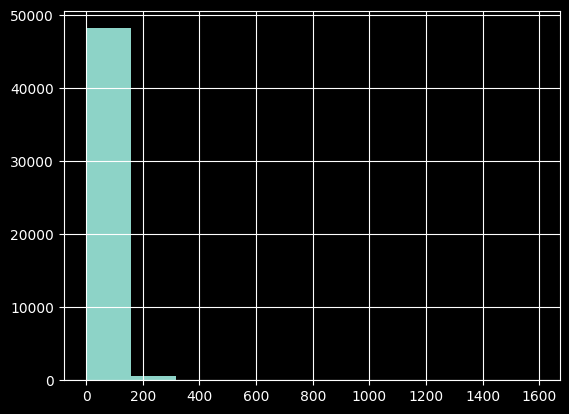

In [12]:
df_info['Delay at Takeoff (Min)'].hist()

In [13]:
df_info['Delay at Takeoff (Min)'].fillna(df_info['Delay at Takeoff (Min)'].mean(), inplace=True)

In [14]:
df_info.isnull().sum()

,0
User No.,0
Gender,0
Client Category,0
Age,0
Travel Type,0
Tier,0
Journey Length,2960
Delay at Takeoff (Min),0
Delay on Arrival (Min),256
Satisfaction Level,0


In [15]:
df_info.dropna(subset=['Journey Length'], axis=0, inplace=True)
df_info.dropna(subset=['Delay on Arrival (Min)'], axis=0, inplace=True)


In [16]:
df_info.isnull().sum()

,0
User No.,0
Gender,0
Client Category,0
Age,0
Travel Type,0
Tier,0
Journey Length,0
Delay at Takeoff (Min),0
Delay on Arrival (Min),0
Satisfaction Level,0


In [17]:
df_info.shape

(82538, 10)

In [18]:
df_info.duplicated().sum()

0

## df_satis check

In [19]:
df_satis

,User No.,Wireless Internet Onboard,Timing Convenience,Online Reservation Simplicity,Boarding Gate Location,Meals and Beverages,Internet Check-in,Seating Ease,Entertainment Onboard,Inflight Service,Space for Legs,Luggage Management,Registration Service,Service During Flight,Cleanliness
0,15450,3,1,1,1,3.0,3,3,3,3,1,3.0,1,4,3.0
1,99889,1,1,4,1,3.0,4,4,3,3,3,3.0,5,3,NaN
2,81294,4,4,4,3,1.0,4,4,1,5,4,1.0,3,3,NaN
3,101608,4,4,4,4,3.0,5,4,4,4,4,4.0,5,4,5.0
4,109980,2,4,2,2,NaN,5,3,5,5,2,5.0,3,5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85741,7625,3,4,3,4,2.0,3,2,2,3,2,4.0,4,4,2.0
85742,88106,2,4,4,4,2.0,2,2,2,1,4,3.0,4,3,2.0
85743,68831,3,5,3,1,3.0,3,4,3,4,4,4.0,3,4,3.0
85744,74401,3,3,4,3,NaN,1,2,5,5,5,NaN,5,5,4.0


In [20]:
df_satis.isnull().sum()

,0
User No.,0
Wireless Internet Onboard,0
Timing Convenience,0
Online Reservation Simplicity,0
Boarding Gate Location,0
Meals and Beverages,41415
Internet Check-in,0
Seating Ease,0
Entertainment Onboard,0
Inflight Service,0


In [21]:
df_satis['Meals and Beverages'].value_counts()

,count
Meals and Beverages,
4.0,10462
3.0,9479
2.0,9472
5.0,9417
1.0,5460
0.0,41


In [22]:
df_satis['Meals and Beverages'].fillna(df_satis['Meals and Beverages'].mean(), inplace=True)

In [23]:
df_satis['Meals and Beverages'].dropna(axis=0, inplace=True)

In [24]:
df_satis['Cleanliness'].value_counts()

,count
Cleanliness,
4.0,18520
3.0,16985
5.0,15421
2.0,11056
1.0,9033
0.0,8


In [25]:
df_satis['Luggage Management'].fillna(df_satis['Luggage Management'].mean(), inplace=True)

In [26]:
df_satis.isnull().sum()

,0
User No.,0
Wireless Internet Onboard,0
Timing Convenience,0
Online Reservation Simplicity,0
Boarding Gate Location,0
Meals and Beverages,0
Internet Check-in,0
Seating Ease,0
Entertainment Onboard,0
Inflight Service,0


In [27]:
df_satis['Cleanliness'].fillna(df_satis['Cleanliness'].mean(), inplace=True)

In [28]:
df_satis.isnull().sum()

,0
User No.,0
Wireless Internet Onboard,0
Timing Convenience,0
Online Reservation Simplicity,0
Boarding Gate Location,0
Meals and Beverages,0
Internet Check-in,0
Seating Ease,0
Entertainment Onboard,0
Inflight Service,0


In [29]:
df_satis.shape

(85746, 15)

In [30]:
df_info.shape

(82538, 10)

In [31]:
df_merge = pd.merge(df_satis, df_info, on='User No.', how='inner')


In [32]:
df_merge = df_merge.reset_index(drop=True)

## df merge 생성

In [33]:
df_merge

,User No.,Wireless Internet Onboard,Timing Convenience,Online Reservation Simplicity,Boarding Gate Location,Meals and Beverages,Internet Check-in,Seating Ease,Entertainment Onboard,Inflight Service,Space for Legs,Luggage Management,Registration Service,Service During Flight,Cleanliness,Gender,Client Category,Age,Travel Type,Tier,Journey Length,Delay at Takeoff (Min),Delay on Arrival (Min),Satisfaction Level
0,15450,3,1,1,1,3.000000,3,3,3,3,1,3.000000,1,4,3.00000,Male,Loyal Customer,58,Business travel,Eco,377.0,14.811088,96.0,neutral
1,81294,4,4,4,3,1.000000,4,4,1,5,4,1.000000,3,3,3.28464,Female,Loyal Customer,33,Personal Travel,Other,1020.0,56.000000,43.0,neutral
2,101608,4,4,4,4,3.000000,5,4,4,4,4,4.000000,5,4,5.00000,Female,Other,51,Business travel,Business,1371.0,14.811088,0.0,satisfied
3,109980,2,4,2,2,3.198078,5,3,5,5,2,5.000000,3,5,2.00000,Female,Other,46,Personal Travel,Other,1092.0,0.000000,0.0,neutral
4,87600,3,3,3,3,3.000000,5,4,5,5,5,5.000000,3,5,5.00000,Male,Loyal Customer,53,Business travel,Business,432.0,14.811088,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87580,68831,3,5,3,1,3.000000,3,4,3,4,4,4.000000,3,4,3.00000,Female,Loyal Customer,43,Personal Travel,Other,528.0,0.000000,6.0,dissatisfied
87581,74401,3,3,4,3,3.198078,1,2,5,5,5,3.634307,5,5,4.00000,Female,Loyal Customer,27,Business travel,Business,1517.0,14.811088,24.0,satisfied
87582,74401,3,3,4,3,3.198078,1,2,5,5,5,3.634307,5,5,4.00000,Female,Loyal Customer,27,Business travel,Business,192.0,14.811088,40.0,satisfied
87583,56918,5,5,5,5,4.000000,4,4,4,3,2,4.000000,1,3,4.00000,Female,Loyal Customer,29,Business travel,Business,2425.0,25.000000,25.0,satisfied


In [34]:
# df_merge.drop(['index'], axis=1, inplace=True)

In [35]:
df_merge['Satisfaction Level'].value_counts()

,count
Satisfaction Level,
satisfied,38046
dissatisfied,24815
neutral,24724


In [36]:
24815 / (24815 + 38046 + 24724)

0.28332477022321173

In [99]:
df_merge['Total Delay (Min)'] = df_merge['Delay at Takeoff (Min)'] + df_merge['Delay on Arrival (Min)']


In [100]:
df_merge

,User No.,Wireless Internet Onboard,Timing Convenience,Online Reservation Simplicity,Boarding Gate Location,Meals and Beverages,Internet Check-in,Seating Ease,Entertainment Onboard,Inflight Service,Space for Legs,Luggage Management,Registration Service,Service During Flight,Cleanliness,Gender,Client Category,Age,Travel Type,Tier,Journey Length,Delay at Takeoff (Min),Delay on Arrival (Min),Satisfaction Level,Total Delay (Min),delayed
0,15450,3,1,1,1,3.000000,3,3,3,3,1,3.000000,1,4,3.00000,Male,Loyal Customer,58,Business travel,Eco,377.0,14.811088,96.0,neutral,110.811088,1
1,81294,4,4,4,3,1.000000,4,4,1,5,4,1.000000,3,3,3.28464,Female,Loyal Customer,33,Personal Travel,Other,1020.0,56.000000,43.0,neutral,99.000000,1
2,101608,4,4,4,4,3.000000,5,4,4,4,4,4.000000,5,4,5.00000,Female,Other,51,Business travel,Business,1371.0,14.811088,0.0,satisfied,14.811088,1
3,109980,2,4,2,2,3.198078,5,3,5,5,2,5.000000,3,5,2.00000,Female,Other,46,Personal Travel,Other,1092.0,0.000000,0.0,neutral,0.000000,0
4,87600,3,3,3,3,3.000000,5,4,5,5,5,5.000000,3,5,5.00000,Male,Loyal Customer,53,Business travel,Business,432.0,14.811088,0.0,satisfied,14.811088,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87580,68831,3,5,3,1,3.000000,3,4,3,4,4,4.000000,3,4,3.00000,Female,Loyal Customer,43,Personal Travel,Other,528.0,0.000000,6.0,dissatisfied,6.000000,1
87581,74401,3,3,4,3,3.198078,1,2,5,5,5,3.634307,5,5,4.00000,Female,Loyal Customer,27,Business travel,Business,1517.0,14.811088,24.0,satisfied,38.811088,1
87582,74401,3,3,4,3,3.198078,1,2,5,5,5,3.634307,5,5,4.00000,Female,Loyal Customer,27,Business travel,Business,192.0,14.811088,40.0,satisfied,54.811088,1
87583,56918,5,5,5,5,4.000000,4,4,4,3,2,4.000000,1,3,4.00000,Female,Loyal Customer,29,Business travel,Business,2425.0,25.000000,25.0,satisfied,50.000000,1


총 지연시간 컬럼 생성 및 그에 따른 지연여부 컬럼 생성

In [102]:
df_merge['delayed'] = np.where(df_merge['Total Delay (Min)']>0,1,0)

In [103]:
df_merge['delayed'].value_counts()

,count
delayed,
1,64682
0,22903


In [104]:
22903 / (22903+64682)

0.2614945481532226

# Q2. EDA

In [105]:
df_merge

,User No.,Wireless Internet Onboard,Timing Convenience,Online Reservation Simplicity,Boarding Gate Location,Meals and Beverages,Internet Check-in,Seating Ease,Entertainment Onboard,Inflight Service,Space for Legs,Luggage Management,Registration Service,Service During Flight,Cleanliness,Gender,Client Category,Age,Travel Type,Tier,Journey Length,Delay at Takeoff (Min),Delay on Arrival (Min),Satisfaction Level,Total Delay (Min),delayed
0,15450,3,1,1,1,3.000000,3,3,3,3,1,3.000000,1,4,3.00000,Male,Loyal Customer,58,Business travel,Eco,377.0,14.811088,96.0,neutral,110.811088,1
1,81294,4,4,4,3,1.000000,4,4,1,5,4,1.000000,3,3,3.28464,Female,Loyal Customer,33,Personal Travel,Other,1020.0,56.000000,43.0,neutral,99.000000,1
2,101608,4,4,4,4,3.000000,5,4,4,4,4,4.000000,5,4,5.00000,Female,Other,51,Business travel,Business,1371.0,14.811088,0.0,satisfied,14.811088,1
3,109980,2,4,2,2,3.198078,5,3,5,5,2,5.000000,3,5,2.00000,Female,Other,46,Personal Travel,Other,1092.0,0.000000,0.0,neutral,0.000000,0
4,87600,3,3,3,3,3.000000,5,4,5,5,5,5.000000,3,5,5.00000,Male,Loyal Customer,53,Business travel,Business,432.0,14.811088,0.0,satisfied,14.811088,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87580,68831,3,5,3,1,3.000000,3,4,3,4,4,4.000000,3,4,3.00000,Female,Loyal Customer,43,Personal Travel,Other,528.0,0.000000,6.0,dissatisfied,6.000000,1
87581,74401,3,3,4,3,3.198078,1,2,5,5,5,3.634307,5,5,4.00000,Female,Loyal Customer,27,Business travel,Business,1517.0,14.811088,24.0,satisfied,38.811088,1
87582,74401,3,3,4,3,3.198078,1,2,5,5,5,3.634307,5,5,4.00000,Female,Loyal Customer,27,Business travel,Business,192.0,14.811088,40.0,satisfied,54.811088,1
87583,56918,5,5,5,5,4.000000,4,4,4,3,2,4.000000,1,3,4.00000,Female,Loyal Customer,29,Business travel,Business,2425.0,25.000000,25.0,satisfied,50.000000,1


## Simple check correlation

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
le = LabelEncoder()

In [108]:
categorical_list = []

for i in df_merge.columns:
  if df_merge[i].dtypes == 'O':
    categorical_list.append(i)

In [109]:
categorical_list

['Gender', 'Client Category', 'Travel Type', 'Tier', 'Satisfaction Level']

In [110]:
df_check = df_merge.copy()

In [111]:
for i in categorical_list:
  df_check[i] = le.fit_transform(df_check[i])

In [112]:
df_check

,User No.,Wireless Internet Onboard,Timing Convenience,Online Reservation Simplicity,Boarding Gate Location,Meals and Beverages,Internet Check-in,Seating Ease,Entertainment Onboard,Inflight Service,Space for Legs,Luggage Management,Registration Service,Service During Flight,Cleanliness,Gender,Client Category,Age,Travel Type,Tier,Journey Length,Delay at Takeoff (Min),Delay on Arrival (Min),Satisfaction Level,Total Delay (Min),delayed
0,15450,3,1,1,1,3.000000,3,3,3,3,1,3.000000,1,4,3.00000,1,0,58,0,1,377.0,14.811088,96.0,1,110.811088,1
1,81294,4,4,4,3,1.000000,4,4,1,5,4,1.000000,3,3,3.28464,0,0,33,1,3,1020.0,56.000000,43.0,1,99.000000,1
2,101608,4,4,4,4,3.000000,5,4,4,4,4,4.000000,5,4,5.00000,0,1,51,0,0,1371.0,14.811088,0.0,2,14.811088,1
3,109980,2,4,2,2,3.198078,5,3,5,5,2,5.000000,3,5,2.00000,0,1,46,1,3,1092.0,0.000000,0.0,1,0.000000,0
4,87600,3,3,3,3,3.000000,5,4,5,5,5,5.000000,3,5,5.00000,1,0,53,0,0,432.0,14.811088,0.0,2,14.811088,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87580,68831,3,5,3,1,3.000000,3,4,3,4,4,4.000000,3,4,3.00000,0,0,43,1,3,528.0,0.000000,6.0,0,6.000000,1
87581,74401,3,3,4,3,3.198078,1,2,5,5,5,3.634307,5,5,4.00000,0,0,27,0,0,1517.0,14.811088,24.0,2,38.811088,1
87582,74401,3,3,4,3,3.198078,1,2,5,5,5,3.634307,5,5,4.00000,0,0,27,0,0,192.0,14.811088,40.0,2,54.811088,1
87583,56918,5,5,5,5,4.000000,4,4,4,3,2,4.000000,1,3,4.00000,0,0,29,0,0,2425.0,25.000000,25.0,2,50.000000,1


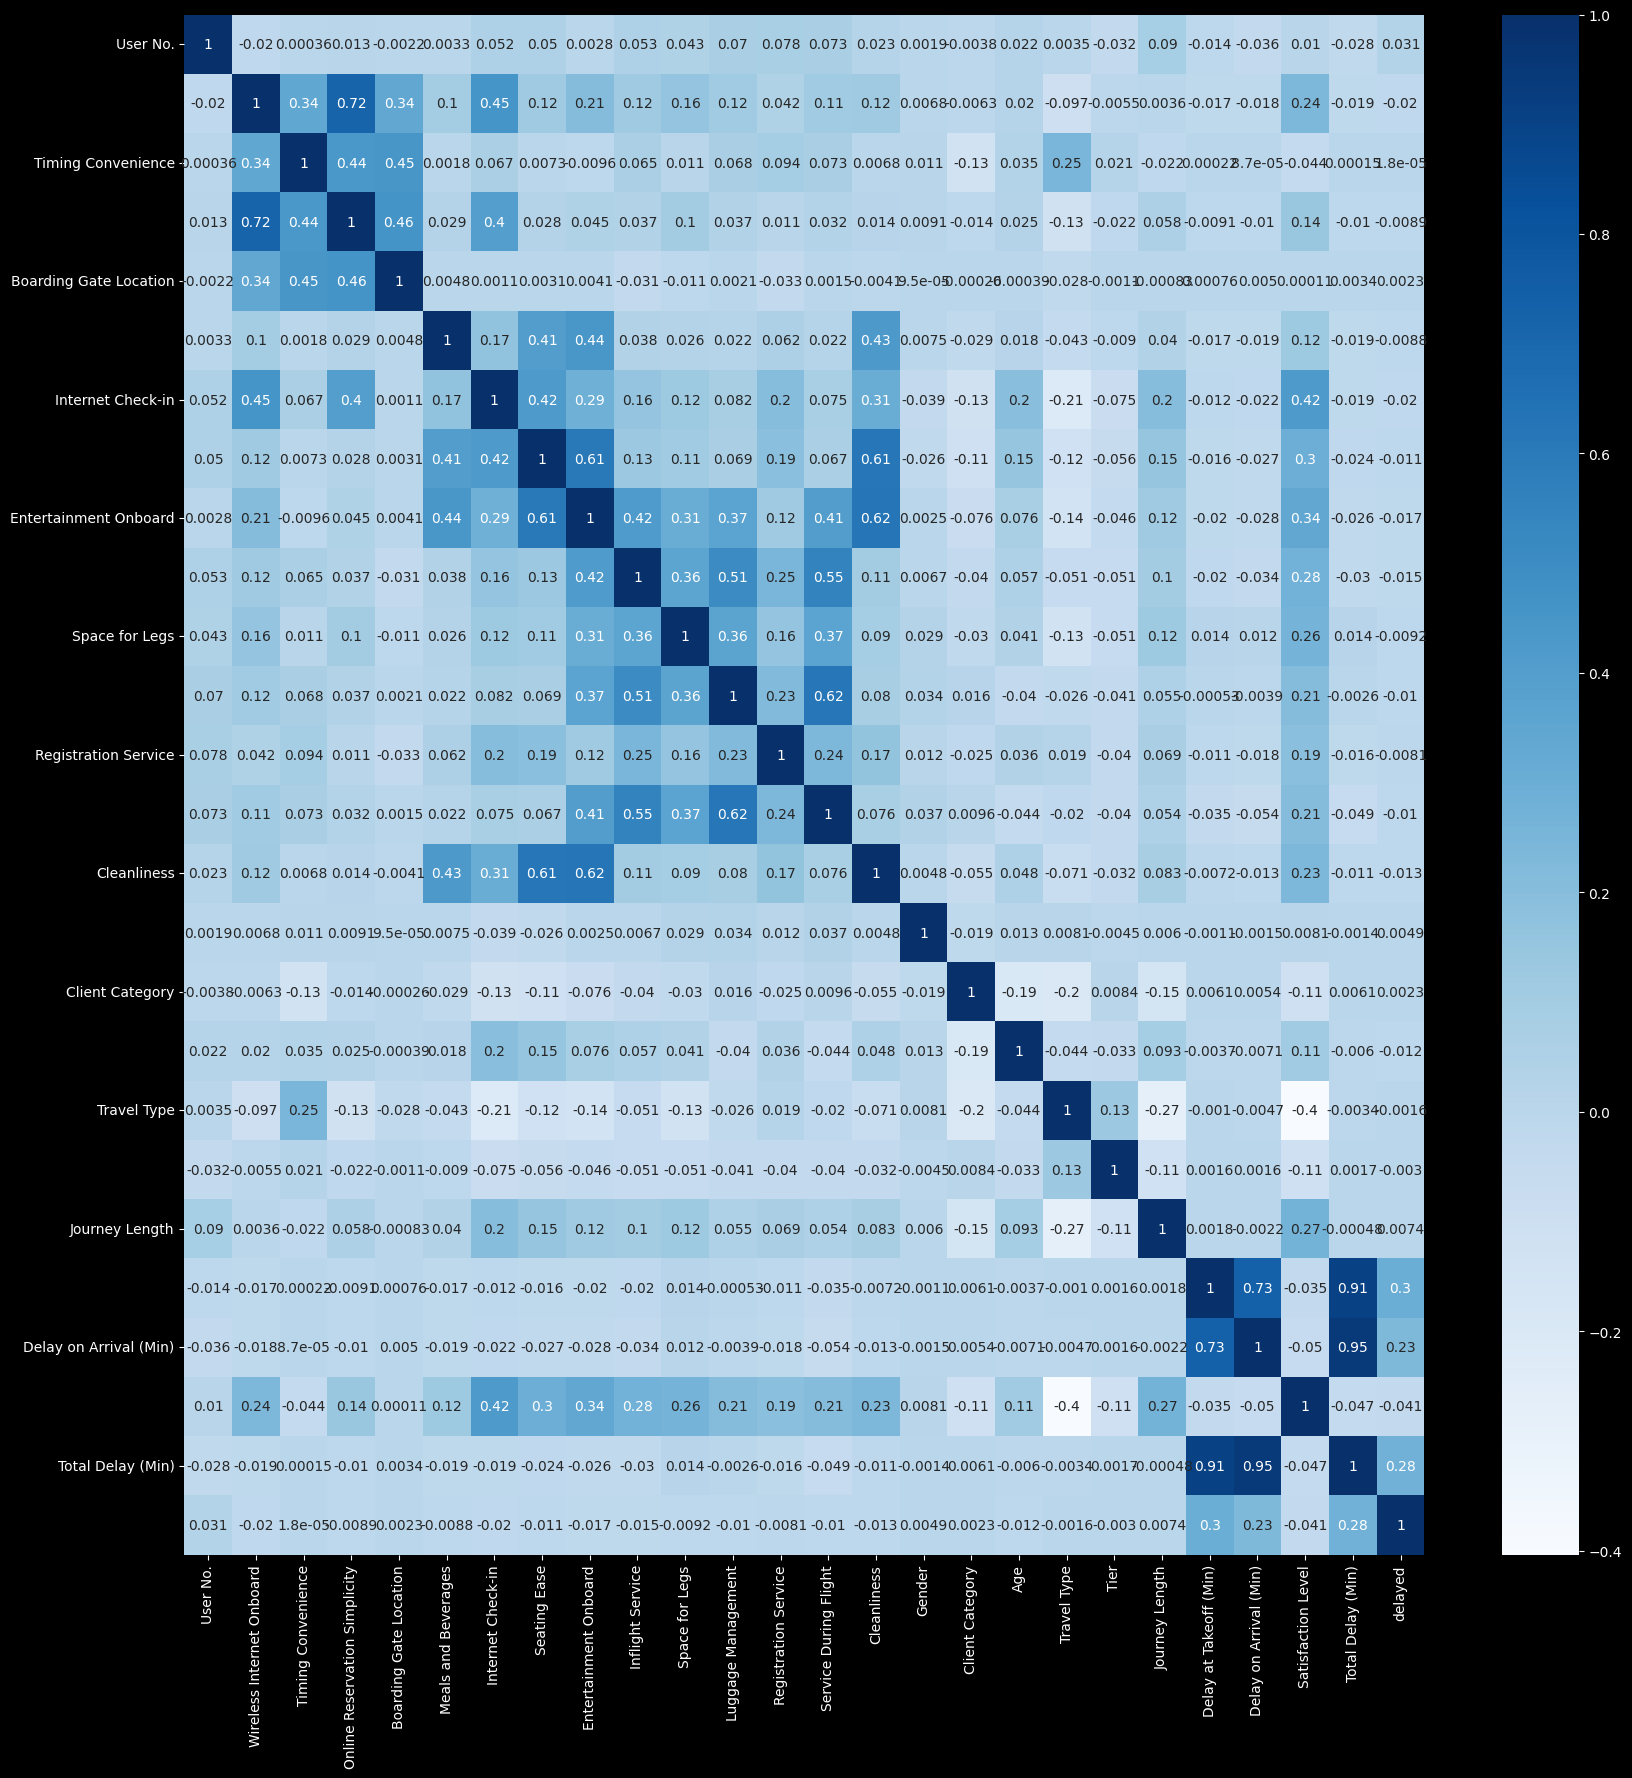

In [113]:
sns.heatmap(df_check.corr(), annot=True, cmap='Blues')


plt.gcf().set_size_inches(20,20)
plt.show()

In [114]:
df_check.corr()['Satisfaction Level'].sort_values(ascending=False)

,Satisfaction Level
Satisfaction Level,1.000000
Internet Check-in,0.422427
Entertainment Onboard,0.337671
Seating Ease,0.295226
Inflight Service,0.276174
Journey Length,0.266622
Space for Legs,0.262848
Wireless Internet Onboard,0.236360
Cleanliness,0.233163
Service During Flight,0.206783


주요 예상 features  :+   Internet Check-in /  Entertainment Onboard /   Seating Ease	           ,   -  Tier /  Travel Type /Client Category

In [175]:
df_eda = df_merge.copy()

In [176]:
df_merge['Satisfaction Level'].value_counts()

,count
Satisfaction Level,
satisfied,38046
dissatisfied,24815
neutral,24724


In [177]:
df_eda['Satisfaction Level'] = np.where(df_eda['Satisfaction Level']  == 'dissatisfied', 1, 0)

In [179]:
# df_eda['Satisfaction Level'] = np.where(df_eda['Satisfaction Level']  == 'neutral',2,
                                        # np.where(df_eda['Satisfaction Level']  == 'satisfied',1,0))

In [180]:
df_eda['Satisfaction Level'].value_counts()

,count
Satisfaction Level,
0,62770
1,24815


In [181]:
24724 / (24724 +62861 )

0.28228577952845807

In [182]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User No.                       87585 non-null  int64  
 1   Wireless Internet Onboard      87585 non-null  int64  
 2   Timing Convenience             87585 non-null  int64  
 3   Online Reservation Simplicity  87585 non-null  int64  
 4   Boarding Gate Location         87585 non-null  int64  
 5   Meals and Beverages            87585 non-null  float64
 6   Internet Check-in              87585 non-null  int64  
 7   Seating Ease                   87585 non-null  int64  
 8   Entertainment Onboard          87585 non-null  int64  
 9   Inflight Service               87585 non-null  int64  
 10  Space for Legs                 87585 non-null  int64  
 11  Luggage Management             87585 non-null  float64
 12  Registration Service           87585 non-null 

In [183]:
categorical_list = []
numerical_list = []

for i in df_eda.columns:
  if df_eda[i].dtypes == 'O':
    categorical_list.append(i)
  else:
    numerical_list.append(i)

In [184]:
categorical_list

['Gender', 'Client Category', 'Travel Type', 'Tier']

In [185]:
numerical_list

['User No.',
 'Wireless Internet Onboard',
 'Timing Convenience',
 'Online Reservation Simplicity',
 'Boarding Gate Location',
 'Meals and Beverages',
 'Internet Check-in',
 'Seating Ease',
 'Entertainment Onboard',
 'Inflight Service',
 'Space for Legs',
 'Luggage Management',
 'Registration Service',
 'Service During Flight',
 'Cleanliness',
 'Age',
 'Journey Length',
 'Delay at Takeoff (Min)',
 'Delay on Arrival (Min)',
 'Satisfaction Level',
 'Total Delay (Min)',
 'delayed']

## Categorical EDA

In [186]:
df_categorical = df_eda[categorical_list]

In [187]:
df_categorical['Satisfaction Level'] = df_eda['Satisfaction Level']

In [188]:
df_categorical

,Gender,Client Category,Travel Type,Tier,Satisfaction Level
0,Male,Loyal Customer,Business travel,Eco,0
1,Female,Loyal Customer,Personal Travel,Other,0
2,Female,Other,Business travel,Business,0
3,Female,Other,Personal Travel,Other,0
4,Male,Loyal Customer,Business travel,Business,0
...,...,...,...,...,...
87580,Female,Loyal Customer,Personal Travel,Other,1
87581,Female,Loyal Customer,Business travel,Business,0
87582,Female,Loyal Customer,Business travel,Business,0
87583,Female,Loyal Customer,Business travel,Business,0


In [189]:
df_categorical.groupby('Gender')['Satisfaction Level'].agg(['sum','count'])

,sum,count
Gender,,
Female,12668,44328
Male,12147,43257


          sum  count  ratio
Gender                     
Female  12668  44328  28.58
Male    12147  43257  28.08


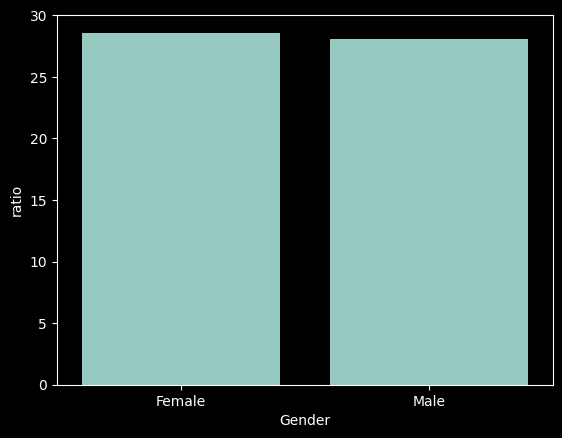

                     sum  count  ratio
Client Category                       
disloyal Customer   3623   9591  37.77
Other               9898  34962  28.31
Loyal Customer     11294  43032  26.25


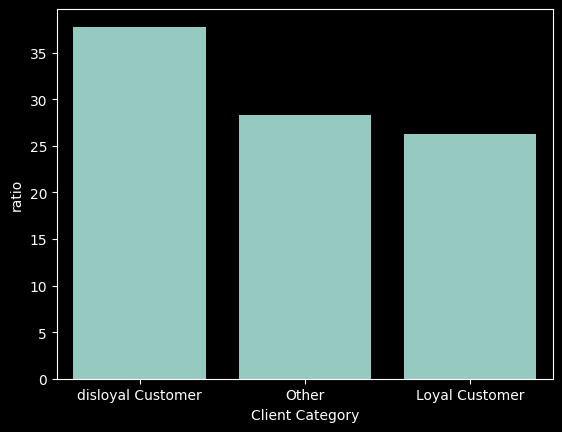

                   sum  count  ratio
Travel Type                         
Personal Travel  12257  27076  45.27
Business travel  12558  60509  20.75


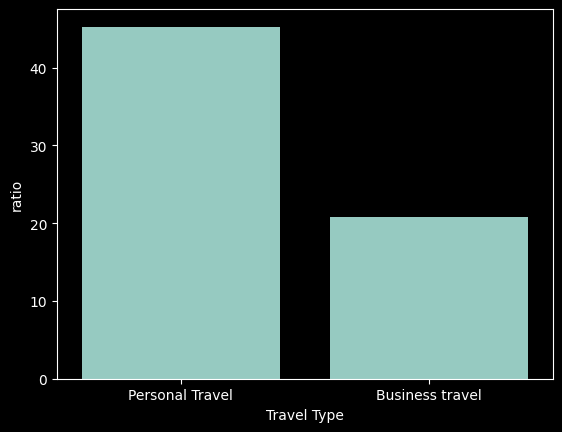

            sum  count  ratio
Tier                         
Eco        9280  22662  40.95
Eco Plus   1403   3662  38.31
Other     10567  37286  28.34
Business   3565  23975  14.87


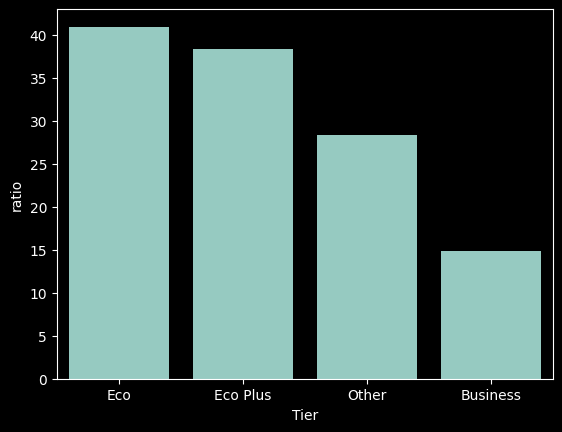

                      sum  count  ratio
Satisfaction Level                     
1                   24815  24815  100.0
0                       0  62770    0.0


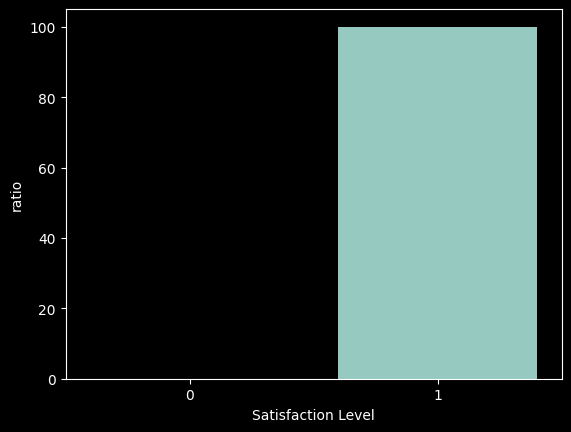

In [190]:
for i in df_categorical.columns:
  print('===================================================')
  df_check = df_categorical.groupby(i)['Satisfaction Level'].agg(['sum','count'])
  df_check['ratio'] = np.round((df_check['sum'] / df_check['count'])*100,2)
  df_check = df_check.sort_values('ratio', ascending=False)
  print(df_check)


  sns.barplot(data=df_check, x=df_check.index, y='ratio')
  plt.show()

## numerical list eda

In [191]:
df_numerical = df_eda[numerical_list]

In [135]:
df_numerical

,User No.,Wireless Internet Onboard,Timing Convenience,Online Reservation Simplicity,Boarding Gate Location,Meals and Beverages,Internet Check-in,Seating Ease,Entertainment Onboard,Inflight Service,Space for Legs,Luggage Management,Registration Service,Service During Flight,Cleanliness,Age,Journey Length,Delay at Takeoff (Min),Delay on Arrival (Min),Satisfaction Level,Total Delay (Min),delayed
0,15450,3,1,1,1,3.000000,3,3,3,3,1,3.000000,1,4,3.00000,58,377.0,14.811088,96.0,2,110.811088,1
1,81294,4,4,4,3,1.000000,4,4,1,5,4,1.000000,3,3,3.28464,33,1020.0,56.000000,43.0,2,99.000000,1
2,101608,4,4,4,4,3.000000,5,4,4,4,4,4.000000,5,4,5.00000,51,1371.0,14.811088,0.0,1,14.811088,1
3,109980,2,4,2,2,3.198078,5,3,5,5,2,5.000000,3,5,2.00000,46,1092.0,0.000000,0.0,2,0.000000,0
4,87600,3,3,3,3,3.000000,5,4,5,5,5,5.000000,3,5,5.00000,53,432.0,14.811088,0.0,1,14.811088,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87580,68831,3,5,3,1,3.000000,3,4,3,4,4,4.000000,3,4,3.00000,43,528.0,0.000000,6.0,0,6.000000,1
87581,74401,3,3,4,3,3.198078,1,2,5,5,5,3.634307,5,5,4.00000,27,1517.0,14.811088,24.0,1,38.811088,1
87582,74401,3,3,4,3,3.198078,1,2,5,5,5,3.634307,5,5,4.00000,27,192.0,14.811088,40.0,1,54.811088,1
87583,56918,5,5,5,5,4.000000,4,4,4,3,2,4.000000,1,3,4.00000,29,2425.0,25.000000,25.0,1,50.000000,1


In [192]:
  df_check = df_numerical.groupby('Satisfaction Level')['Timing Convenience'].mean()
  df_check = df_check.reset_index(drop=True)
  pd.DataFrame(df_check)

,Timing Convenience
0,3.037725
1,3.123877


       User No.
0  65181.115135
1  64679.332984


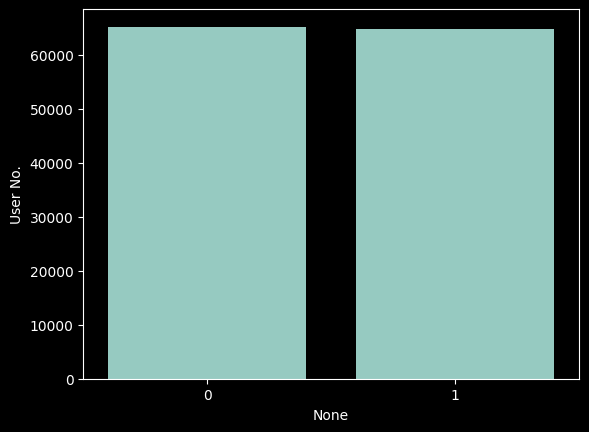

   Wireless Internet Onboard
0                   2.850773
1                   2.420834


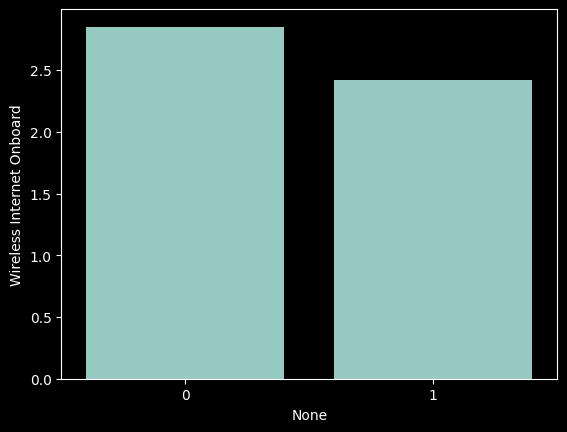

   Timing Convenience
0            3.037725
1            3.123877


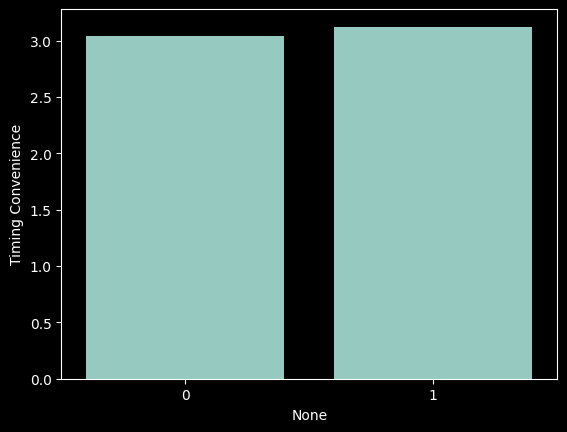

   Online Reservation Simplicity
0                       2.837964
1                       2.561314


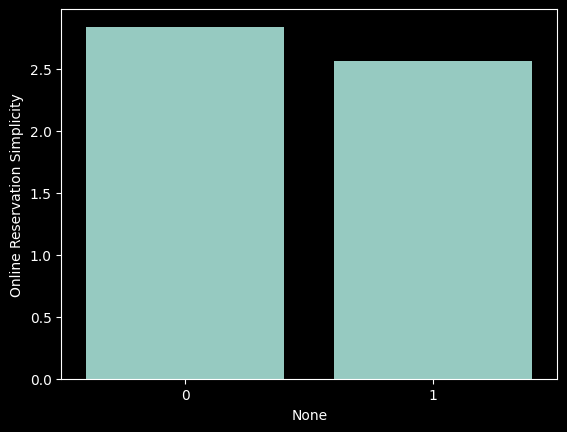

   Boarding Gate Location
0                2.976964
1                2.971267


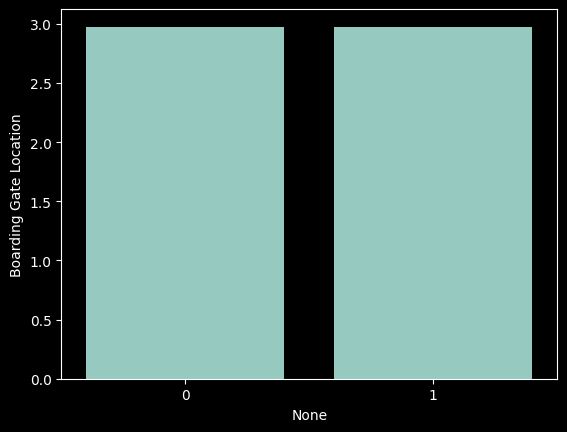

   Meals and Beverages
0             3.243510
1             3.085619


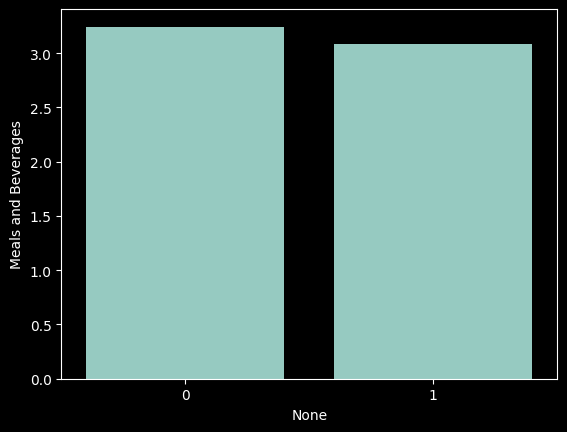

   Internet Check-in
0           3.474399
1           2.697360


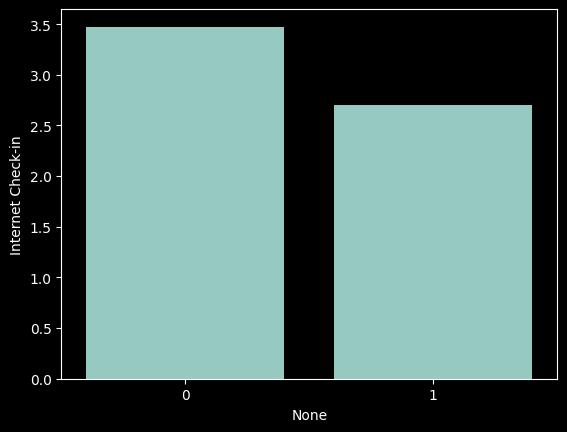

   Seating Ease
0      3.592480
1      3.057183


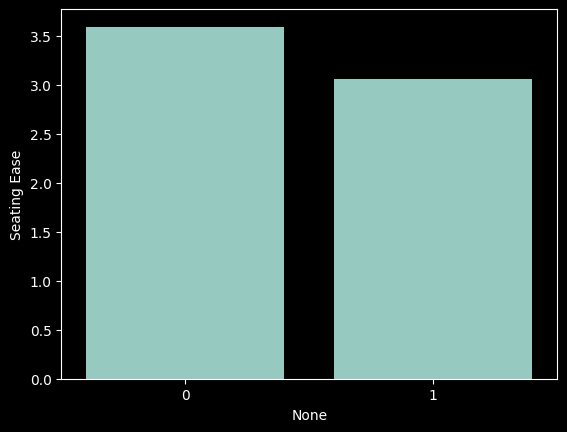

   Entertainment Onboard
0               3.537422
1               2.913923


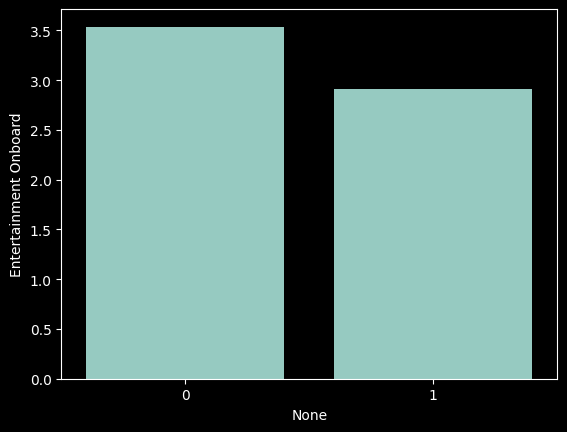

   Inflight Service
0          3.524279
1          3.022648


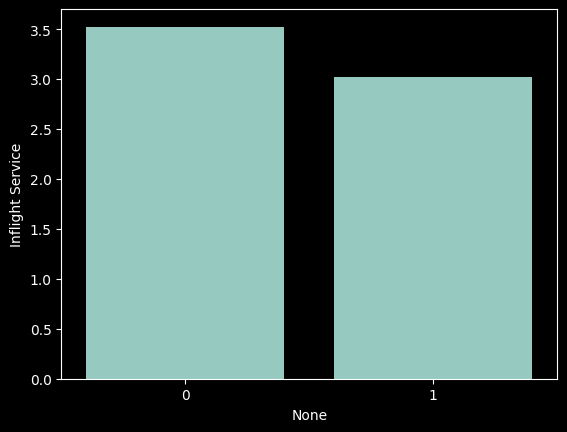

   Space for Legs
0        3.490202
1        3.015192


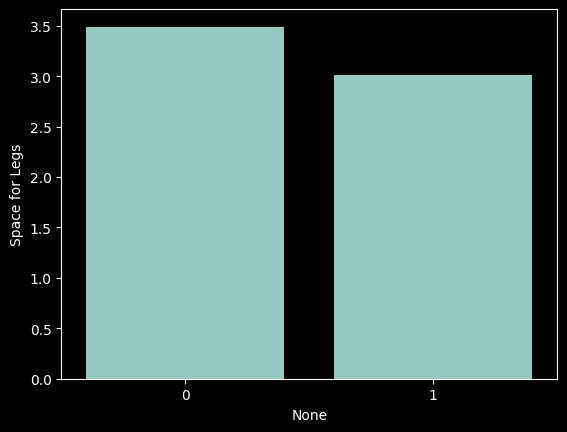

   Luggage Management
0            3.730117
1            3.398446


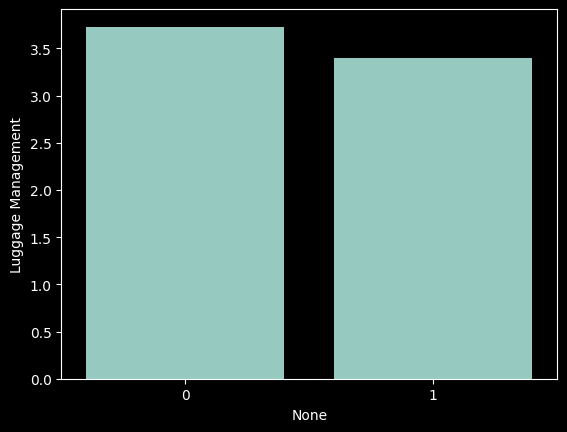

   Registration Service
0              3.395555
1              3.063550


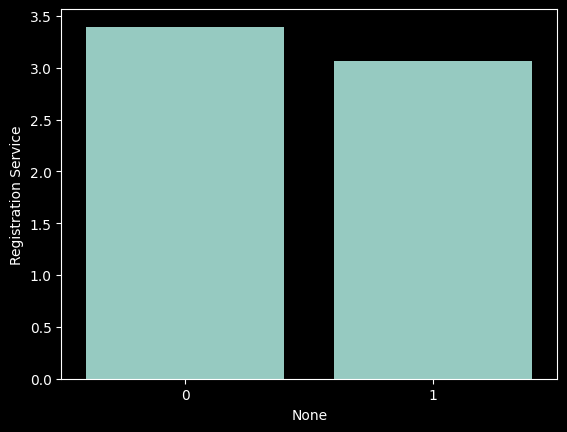

   Service During Flight
0               3.741628
1               3.405481


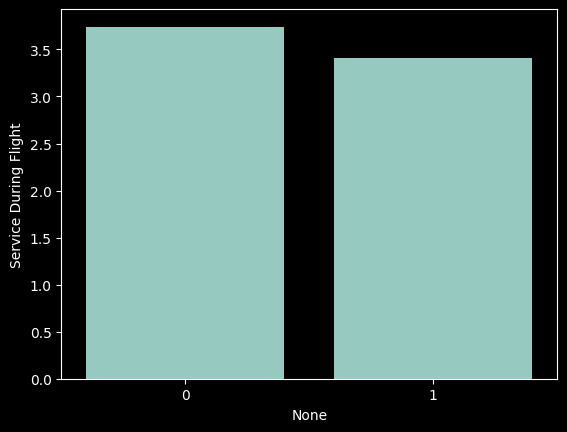

   Cleanliness
0     3.391473
1     3.014764


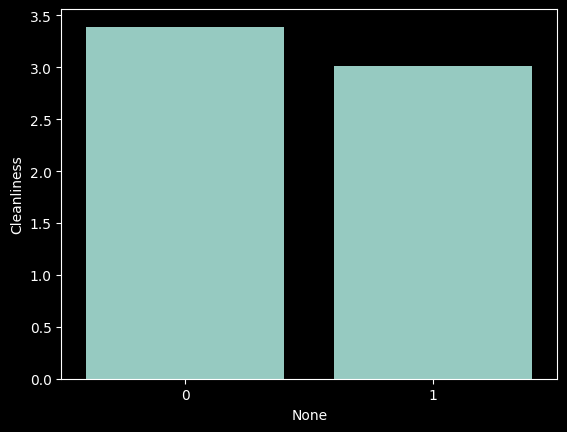

         Age
0  40.065541
1  37.718235


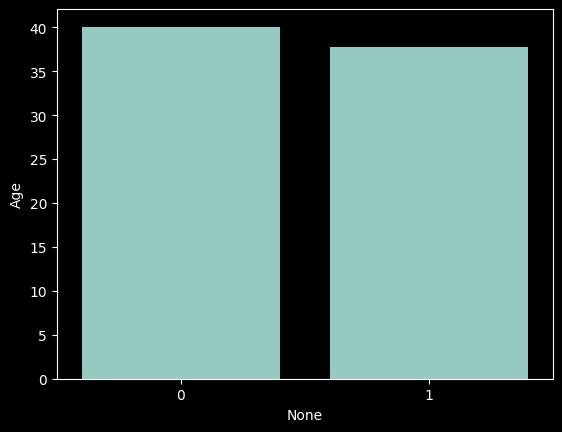

   Journey Length
0     1294.442696
1      931.454685


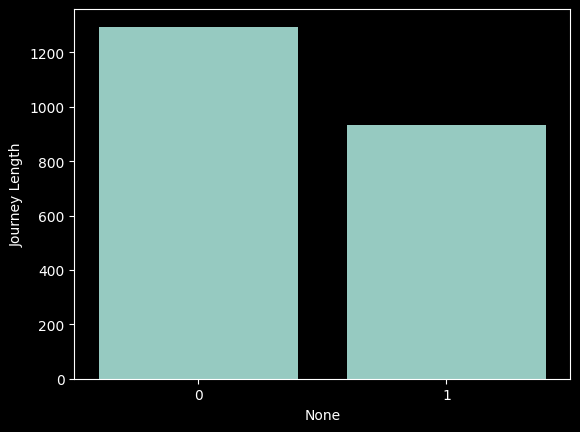

   Delay at Takeoff (Min)
0               14.451860
1               15.605877


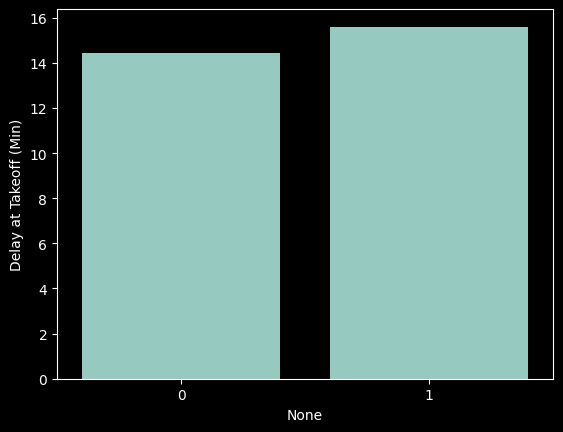

   Delay on Arrival (Min)
0               14.511423
1               16.849003


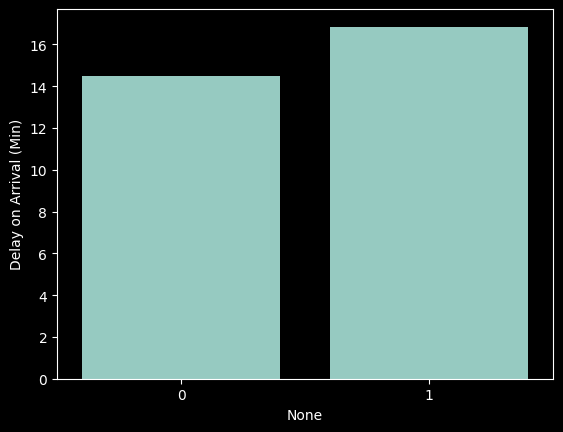

   Satisfaction Level
0                 0.0
1                 1.0


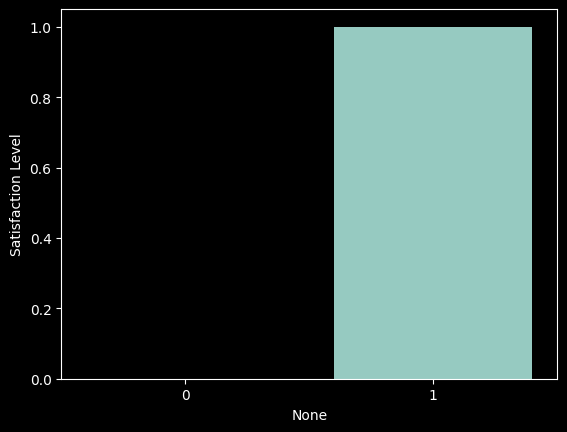

   Total Delay (Min)
0          28.963283
1          32.454880


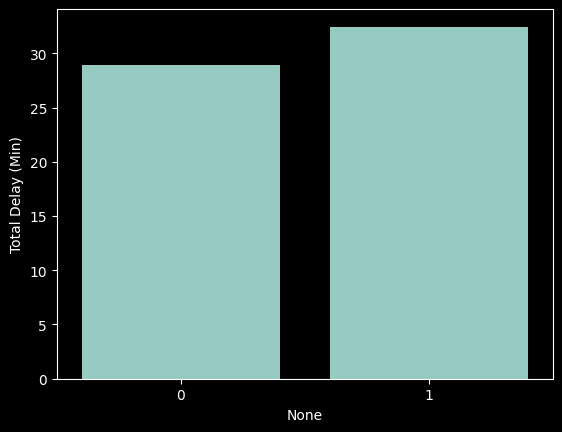

    delayed
0  0.731512
1  0.756196


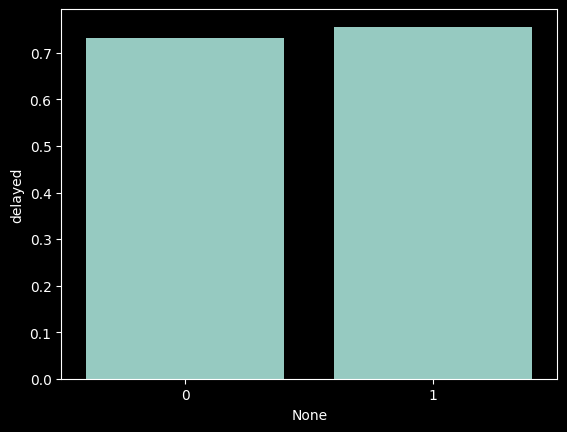

In [193]:

for i in df_numerical.columns:
    print('====================================================')
    df_check = df_numerical.groupby('Satisfaction Level')[i].mean()
    df_check = pd.DataFrame(df_check)
    df_check = df_check.reset_index(drop=True)
    print(df_check)

    sns.barplot(data=df_check, x=df_check.index, y=i)
    plt.show()


# Q3.Modeling

In [194]:
df_model = df_eda.copy()

In [195]:
df_model

,User No.,Wireless Internet Onboard,Timing Convenience,Online Reservation Simplicity,Boarding Gate Location,Meals and Beverages,Internet Check-in,Seating Ease,Entertainment Onboard,Inflight Service,Space for Legs,Luggage Management,Registration Service,Service During Flight,Cleanliness,Gender,Client Category,Age,Travel Type,Tier,Journey Length,Delay at Takeoff (Min),Delay on Arrival (Min),Satisfaction Level,Total Delay (Min),delayed
0,15450,3,1,1,1,3.000000,3,3,3,3,1,3.000000,1,4,3.00000,Male,Loyal Customer,58,Business travel,Eco,377.0,14.811088,96.0,0,110.811088,1
1,81294,4,4,4,3,1.000000,4,4,1,5,4,1.000000,3,3,3.28464,Female,Loyal Customer,33,Personal Travel,Other,1020.0,56.000000,43.0,0,99.000000,1
2,101608,4,4,4,4,3.000000,5,4,4,4,4,4.000000,5,4,5.00000,Female,Other,51,Business travel,Business,1371.0,14.811088,0.0,0,14.811088,1
3,109980,2,4,2,2,3.198078,5,3,5,5,2,5.000000,3,5,2.00000,Female,Other,46,Personal Travel,Other,1092.0,0.000000,0.0,0,0.000000,0
4,87600,3,3,3,3,3.000000,5,4,5,5,5,5.000000,3,5,5.00000,Male,Loyal Customer,53,Business travel,Business,432.0,14.811088,0.0,0,14.811088,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87580,68831,3,5,3,1,3.000000,3,4,3,4,4,4.000000,3,4,3.00000,Female,Loyal Customer,43,Personal Travel,Other,528.0,0.000000,6.0,1,6.000000,1
87581,74401,3,3,4,3,3.198078,1,2,5,5,5,3.634307,5,5,4.00000,Female,Loyal Customer,27,Business travel,Business,1517.0,14.811088,24.0,0,38.811088,1
87582,74401,3,3,4,3,3.198078,1,2,5,5,5,3.634307,5,5,4.00000,Female,Loyal Customer,27,Business travel,Business,192.0,14.811088,40.0,0,54.811088,1
87583,56918,5,5,5,5,4.000000,4,4,4,3,2,4.000000,1,3,4.00000,Female,Loyal Customer,29,Business travel,Business,2425.0,25.000000,25.0,0,50.000000,1


In [196]:
categorical_list = []
for i in df_model.columns:
  if df_model[i].dtypes== 'O':
    categorical_list.append(i)

In [197]:
categorical_list

['Gender', 'Client Category', 'Travel Type', 'Tier']

In [198]:
for i in categorical_list:
  df_model[i] = le.fit_transform(df_model[i])

In [199]:
df_model

,User No.,Wireless Internet Onboard,Timing Convenience,Online Reservation Simplicity,Boarding Gate Location,Meals and Beverages,Internet Check-in,Seating Ease,Entertainment Onboard,Inflight Service,Space for Legs,Luggage Management,Registration Service,Service During Flight,Cleanliness,Gender,Client Category,Age,Travel Type,Tier,Journey Length,Delay at Takeoff (Min),Delay on Arrival (Min),Satisfaction Level,Total Delay (Min),delayed
0,15450,3,1,1,1,3.000000,3,3,3,3,1,3.000000,1,4,3.00000,1,0,58,0,1,377.0,14.811088,96.0,0,110.811088,1
1,81294,4,4,4,3,1.000000,4,4,1,5,4,1.000000,3,3,3.28464,0,0,33,1,3,1020.0,56.000000,43.0,0,99.000000,1
2,101608,4,4,4,4,3.000000,5,4,4,4,4,4.000000,5,4,5.00000,0,1,51,0,0,1371.0,14.811088,0.0,0,14.811088,1
3,109980,2,4,2,2,3.198078,5,3,5,5,2,5.000000,3,5,2.00000,0,1,46,1,3,1092.0,0.000000,0.0,0,0.000000,0
4,87600,3,3,3,3,3.000000,5,4,5,5,5,5.000000,3,5,5.00000,1,0,53,0,0,432.0,14.811088,0.0,0,14.811088,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87580,68831,3,5,3,1,3.000000,3,4,3,4,4,4.000000,3,4,3.00000,0,0,43,1,3,528.0,0.000000,6.0,1,6.000000,1
87581,74401,3,3,4,3,3.198078,1,2,5,5,5,3.634307,5,5,4.00000,0,0,27,0,0,1517.0,14.811088,24.0,0,38.811088,1
87582,74401,3,3,4,3,3.198078,1,2,5,5,5,3.634307,5,5,4.00000,0,0,27,0,0,192.0,14.811088,40.0,0,54.811088,1
87583,56918,5,5,5,5,4.000000,4,4,4,3,2,4.000000,1,3,4.00000,0,0,29,0,0,2425.0,25.000000,25.0,0,50.000000,1


In [200]:
X = df_model.drop(['Satisfaction Level'], axis=1)

In [201]:
Y = df_model['Satisfaction Level']

In [202]:
X

,User No.,Wireless Internet Onboard,Timing Convenience,Online Reservation Simplicity,Boarding Gate Location,Meals and Beverages,Internet Check-in,Seating Ease,Entertainment Onboard,Inflight Service,Space for Legs,Luggage Management,Registration Service,Service During Flight,Cleanliness,Gender,Client Category,Age,Travel Type,Tier,Journey Length,Delay at Takeoff (Min),Delay on Arrival (Min),Total Delay (Min),delayed
0,15450,3,1,1,1,3.000000,3,3,3,3,1,3.000000,1,4,3.00000,1,0,58,0,1,377.0,14.811088,96.0,110.811088,1
1,81294,4,4,4,3,1.000000,4,4,1,5,4,1.000000,3,3,3.28464,0,0,33,1,3,1020.0,56.000000,43.0,99.000000,1
2,101608,4,4,4,4,3.000000,5,4,4,4,4,4.000000,5,4,5.00000,0,1,51,0,0,1371.0,14.811088,0.0,14.811088,1
3,109980,2,4,2,2,3.198078,5,3,5,5,2,5.000000,3,5,2.00000,0,1,46,1,3,1092.0,0.000000,0.0,0.000000,0
4,87600,3,3,3,3,3.000000,5,4,5,5,5,5.000000,3,5,5.00000,1,0,53,0,0,432.0,14.811088,0.0,14.811088,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87580,68831,3,5,3,1,3.000000,3,4,3,4,4,4.000000,3,4,3.00000,0,0,43,1,3,528.0,0.000000,6.0,6.000000,1
87581,74401,3,3,4,3,3.198078,1,2,5,5,5,3.634307,5,5,4.00000,0,0,27,0,0,1517.0,14.811088,24.0,38.811088,1
87582,74401,3,3,4,3,3.198078,1,2,5,5,5,3.634307,5,5,4.00000,0,0,27,0,0,192.0,14.811088,40.0,54.811088,1
87583,56918,5,5,5,5,4.000000,4,4,4,3,2,4.000000,1,3,4.00000,0,0,29,0,0,2425.0,25.000000,25.0,50.000000,1


In [203]:
Y

,Satisfaction Level
0,0
1,0
2,0
3,0
4,0
...,...
87580,1
87581,0
87582,0
87583,0


In [204]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



from sklearn.metrics import accuracy_score, precision_recall_curve, classification_report, confusion_matrix, roc_curve, roc_auc_score

import xgboost as xgb
import lightgbm as lgb
import tensorflow as tf

import shap

In [205]:
scaler= StandardScaler()

In [206]:
pd.DataFrame(scaler.fit_transform(X))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,-1.325760,0.204337,-1.354535,-1.26016,-1.545643,-0.208560,-0.188862,-0.334396,-0.270882,-0.296592,-1.792635,-0.553947,-1.822489,0.301403,-0.239299,1.012304,-0.916421,1.234470,-0.668932,-0.484546,-0.815774,0.001107,2.071525,1.272130,0.595051
1,0.434579,0.958240,0.616048,0.88835,0.019288,-2.307010,0.553974,0.424186,-1.772572,1.255619,0.490375,-2.295519,-0.238742,-0.550955,-0.000085,-0.987846,-0.916421,-0.424808,1.494919,1.079764,-0.171847,1.414152,0.713170,1.086309,0.595051
2,0.977673,0.958240,0.616048,0.88835,0.801754,-0.208560,1.296810,0.424186,0.479963,0.479513,0.490375,0.316839,1.345005,0.301403,1.441517,-0.987846,0.566010,0.769872,-0.668932,-1.266700,0.179660,0.001107,-0.388893,-0.238217,0.595051
3,1.201498,-0.549565,0.616048,-0.54399,-0.763177,-0.000732,1.296810,-0.334396,1.230808,1.255619,-1.031632,1.187624,-0.238742,1.153760,-1.079708,-0.987846,0.566010,0.438017,1.494919,1.079764,-0.099743,-0.507009,-0.388893,-0.471237,-1.680527
4,0.603169,0.204337,-0.040813,0.17218,0.019288,-0.208560,1.296810,0.424186,1.230808,1.255619,1.251378,1.187624,-0.238742,1.153760,1.441517,1.012304,-0.916421,0.902614,-0.668932,-1.266700,-0.760695,0.001107,-0.388893,-0.238217,0.595051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87580,0.101380,0.204337,1.272908,0.17218,-1.545643,-0.208560,-0.188862,0.424186,-0.270882,0.479513,0.490375,0.316839,-0.238742,0.301403,-0.239299,-0.987846,-0.916421,0.238903,1.494919,1.079764,-0.664557,-0.507009,-0.235116,-0.376840,0.595051
87581,0.250294,0.204337,-0.040813,0.88835,0.019288,-0.000732,-1.674534,-1.092978,1.230808,1.255619,1.251378,-0.001602,1.345005,1.153760,0.601109,-0.987846,-0.916421,-0.823034,-0.668932,-1.266700,0.325870,0.001107,0.226212,0.139370,0.595051
87582,0.250294,0.204337,-0.040813,0.88835,0.019288,-0.000732,-1.674534,-1.092978,1.230808,1.255619,1.251378,-0.001602,1.345005,1.153760,0.601109,-0.987846,-0.916421,-0.823034,-0.668932,-1.266700,-1.001041,0.001107,0.636282,0.391094,0.595051
87583,-0.217113,1.712143,1.272908,1.60452,1.584219,0.840664,0.553974,0.424186,0.479963,-0.296592,-1.031632,0.316839,-1.822489,-0.550955,0.601109,-0.987846,-0.916421,-0.690292,-0.668932,-1.266700,1.235180,0.350652,0.251841,0.315402,0.595051


In [207]:
X_scaled =pd.DataFrame(scaler.fit_transform(X))

In [208]:
Y.value_counts()

,count
Satisfaction Level,
0,62770
1,24815


In [212]:
xx, _, yy, _ = train_test_split(X_scaled, Y, test_size=0.9, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=0.3, random_state=42)

In [213]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6130, 25)
(2628, 25)
(6130,)
(2628,)


In [155]:
from sklearn.metrics import accuracy_score

In [244]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)
xx, _, yy, _ = train_test_split(X_resampled, Y_resampled, test_size=0.9, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=0.3, random_state=42)

In [161]:
# xx, _, yy, _ = train_test_split(X_resampled, Y_resampled, test_size=0.9, random_state=42)

In [245]:
print(x_train.shape)

(8787, 25)


In [246]:
rfc = RandomForestClassifier()


cross_val
[0.77303754 0.78100114 0.77859989 0.78827547 0.7985202 ]
0.7838868481866454
class_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4442
           1       1.00      1.00      1.00      4345

    accuracy                           1.00      8787
   macro avg       1.00      1.00      1.00      8787
weighted avg       1.00      1.00      1.00      8787

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1879
           1       0.76      0.79      0.78      1888

    accuracy                           0.77      3767
   macro avg       0.77      0.77      0.77      3767
weighted avg       0.77      0.77      0.77      3767



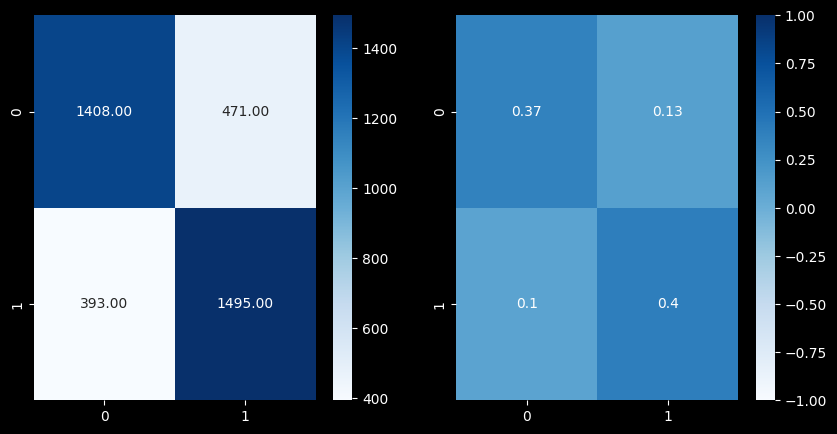

Internet Check-in                0.112997
Wireless Internet Onboard        0.071359
Journey Length                   0.063659
User No.                         0.054147
Age                              0.053686
Luggage Management               0.049590
Seating Ease                     0.048238
Space for Legs                   0.044310
Cleanliness                      0.040300
Entertainment Onboard            0.039470
Total Delay (Min)                0.039414
Inflight Service                 0.038567
Meals and Beverages              0.035124
Service During Flight            0.032833
Online Reservation Simplicity    0.031441
Tier                             0.030389
Delay at Takeoff (Min)           0.030315
Registration Service             0.030304
Travel Type                      0.030266
Delay on Arrival (Min)           0.029378
dtype: float64


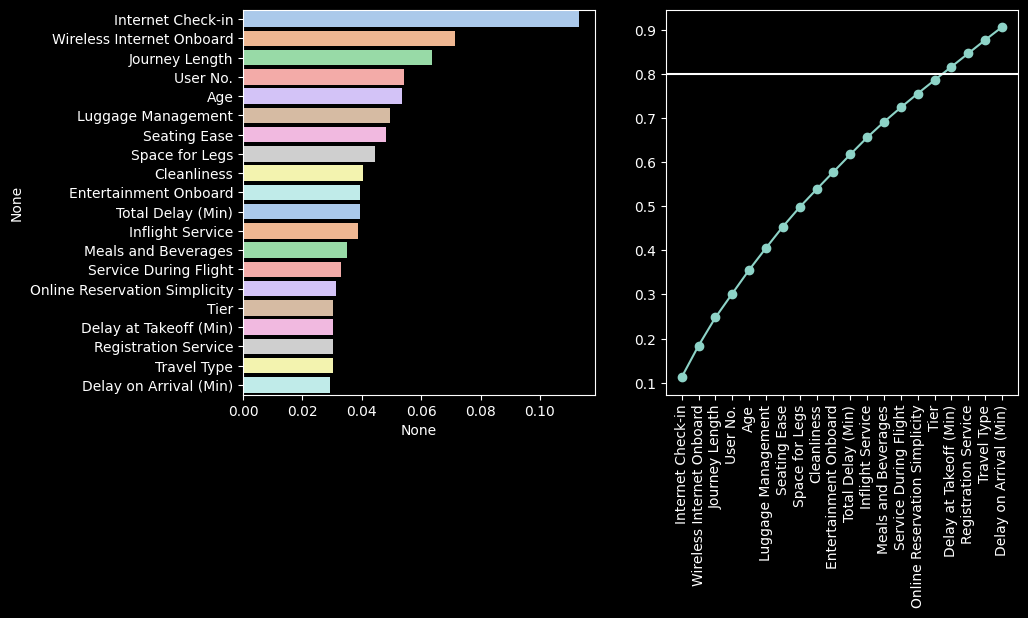

roc curve
     precision    recall  thresholds        f1
0     0.501195  1.000000        0.00  0.667728
1     0.527095  0.999470        0.01  0.690198
2     0.542470  0.997881        0.02  0.702854
3     0.553304  0.997881        0.03  0.711884
4     0.560881  0.997881        0.04  0.718125
..         ...       ...         ...       ...
96    1.000000  0.090042        0.96  0.165209
97    1.000000  0.072564        0.97  0.135309
98    1.000000  0.050318        0.98  0.095814
99    1.000000  0.033898        0.99  0.065574
100   1.000000  0.013242        1.00  0.026137

[101 rows x 4 columns]


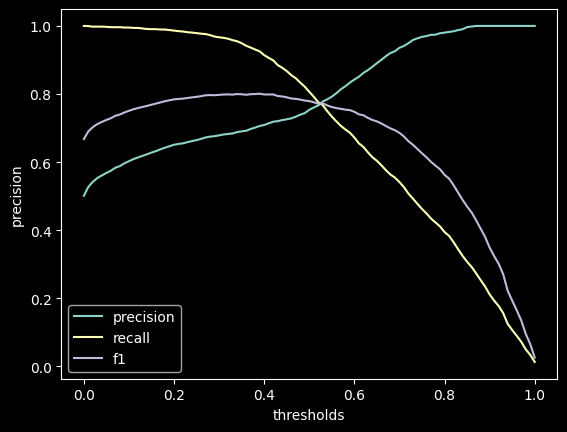

         fpr       tpr  thred
0   0.000000  0.000000    inf
1   0.000000  0.013242   1.00
2   0.000000  0.033898   0.99
3   0.000000  0.050318   0.98
4   0.000000  0.072564   0.97
..       ...       ...    ...
95  0.784992  0.997881   0.04
96  0.809473  0.997881   0.03
97  0.845663  0.997881   0.02
98  0.901011  0.999470   0.01
99  1.000000  1.000000   0.00

[100 rows x 3 columns]
0.8850675057053428
     precision    recall  thresholds        f1
0     0.501195  1.000000        0.00  0.667728
1     0.527095  0.999470        0.01  0.690198
2     0.542470  0.997881        0.02  0.702854
3     0.553304  0.997881        0.03  0.711884
4     0.560881  0.997881        0.04  0.718125
..         ...       ...         ...       ...
96    1.000000  0.090042        0.96  0.165209
97    1.000000  0.072564        0.97  0.135309
98    1.000000  0.050318        0.98  0.095814
99    1.000000  0.033898        0.99  0.065574
100   1.000000  0.013242        1.00  0.026137

[101 rows x 4 columns]


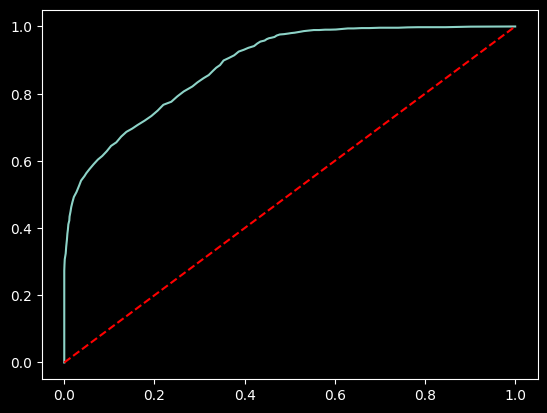

In [247]:
rfc = RandomForestClassifier()


rfc.fit(x_train, y_train)


y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

print('cross_val')
cross_val = cross_val_score(rfc, x_train, y_train, cv=kfold, scoring='accuracy')
print(cross_val)
print(cross_val.mean())


print('class_report')
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))


c_matrix = confusion_matrix(y_test, y_pred_test)
c_matrix_ratio = np.round(c_matrix / c_matrix.sum(),2)

figs, axes = plt.subplots(1,2, figsize=(10,5))
sns.heatmap(c_matrix, cmap='Blues', annot=True, ax=axes[0], fmt='.2f')
sns.heatmap(c_matrix_ratio, vmax=1, vmin=-1, cmap='Blues', annot=True, ax=axes[1])
plt.show()


figs, axes = plt.subplots(1,2, figsize=(10,5))

top10 = pd.Series(rfc.feature_importances_, index=x_train.columns)
top10 = top10.sort_values(ascending=False).head(20)
print(top10)
sns.barplot(x=top10, y=top10.index, ax=axes[0], palette = 'pastel')
axes[1].plot(top10.cumsum(), marker='o')
plt.xticks(rotation=90)
axes[1].axhline(y=0.8)
plt.show()



print('roc curve')
y_pred_test_prob = rfc.predict_proba(x_test)[:,1]



precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob)
precision_recall = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1], 'thresholds':thresholds})
precision_recall['f1'] = 2 *(precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
print(precision_recall)

sns.lineplot(data=precision_recall, x='thresholds' ,y='precision', label='precision')
sns.lineplot(data=precision_recall, x='thresholds' ,y='recall', label='recall')
sns.lineplot(data=precision_recall, x='thresholds' ,y='f1', label='f1')
plt.legend()
plt.show()



fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)



print(pd.DataFrame({'fpr': fpr, 'tpr':tpr, 'thred':thresholds}))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], color='red', linestyle='--')

print(roc_auc_score(y_test, y_pred_test_prob))

a= 0.5

y_pred_test = np.where(y_pred_test_prob >a, 1, 0)



precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob)
precision_recall = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1], 'thresholds':thresholds})
precision_recall['f1'] = 2 *(precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
print(precision_recall)





In [223]:
from sklearn.model_selection import GridSearchCV

In [230]:
param_grid = [{
    'max_depth' : [2,12],
    'n_estimators' : [200,800]
}]






# grid_rfc = GridSearchCV(rfc, x_train, y_train, param_grid=param_grid, cv=5, scoring='accuracy')
grid_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')

grid_rfc.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 12], 'n_estimators': [200, 800]}],
             scoring='accuracy')

In [231]:
print(grid_rfc.best_estimator_)
print(grid_rfc.best_score_)
print(grid_rfc.best_params_)

RandomForestClassifier(max_depth=12, n_estimators=800)
0.7270943550030569
{'max_depth': 12, 'n_estimators': 800}


In [232]:
rfc_grid = grid_rfc.best_estimator_

In [251]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

In [254]:
param_distributions = {
    'max_depth' : randint(2,12),
    'n_estimators' : randint(200,800),
    'learning_rate' : uniform(0.01,0.03)
}






randomcv_xgb = RandomizedSearchCV(estimator=xgb_c, n_iter = 100, param_distributions=param_distributions, cv=5, scoring='accuracy')

randomcv_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=None, ...),
                   n_iter=100,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7902112d0280>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x790211bb4940>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x790211bb5b40>},
                   scoring='accuracy')

In [ ]:
print(randomcv_xgb.best_estimator_)
print(randomcv_xgb.best_score_)
print(randomcv_xgb.best_params_)

cross_val
[0.72610556 0.7189729  0.7275321  0.74857143 0.71      ]
0.7262363969839005
class_report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2535
           1       1.00      0.97      0.99       968

    accuracy                           0.99      3503
   macro avg       1.00      0.99      0.99      3503
weighted avg       0.99      0.99      0.99      3503

              precision    recall  f1-score   support

           0       0.75      0.92      0.83      3787
           1       0.49      0.20      0.28      1468

    accuracy                           0.72      5255
   macro avg       0.62      0.56      0.55      5255
weighted avg       0.68      0.72      0.67      5255



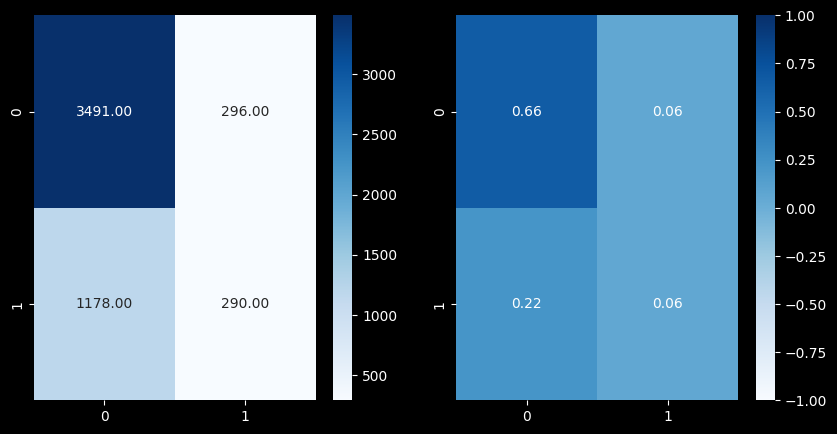

20    0.088373
6     0.077859
0     0.076699
18    0.074031
17    0.071434
1     0.057082
23    0.043904
10    0.038817
8     0.037879
22    0.036405
12    0.034206
9     0.033926
7     0.031996
11    0.031569
3     0.030734
21    0.030486
14    0.030083
2     0.029310
5     0.028826
4     0.027658
dtype: float64


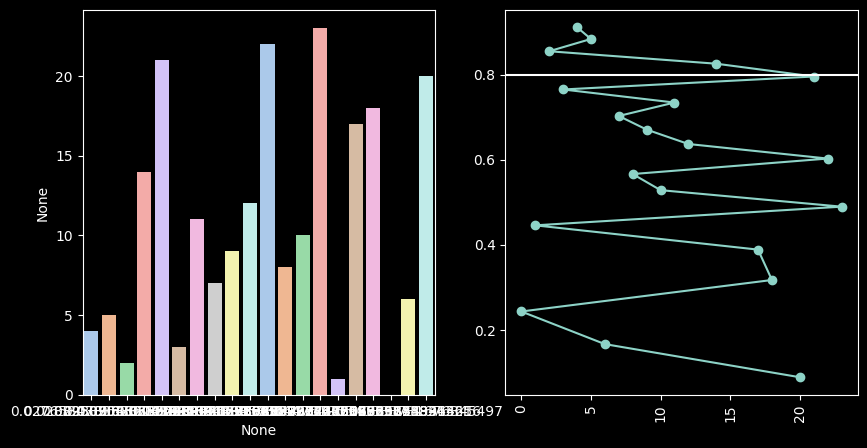

roc curve
      precision    recall  thresholds        f1
0      0.279353  1.000000    0.000179  0.436710
1      0.279406  1.000000    0.000192  0.436775
2      0.279459  1.000000    0.000223  0.436840
3      0.279513  1.000000    0.000229  0.436905
4      0.279566  1.000000    0.000232  0.436970
...         ...       ...         ...       ...
5250   0.800000  0.002725    0.649272  0.005431
5251   0.750000  0.002044    0.653908  0.004076
5252   1.000000  0.002044    0.655602  0.004079
5253   1.000000  0.001362    0.663711  0.002721
5254   1.000000  0.000681    0.711718  0.001361

[5255 rows x 4 columns]


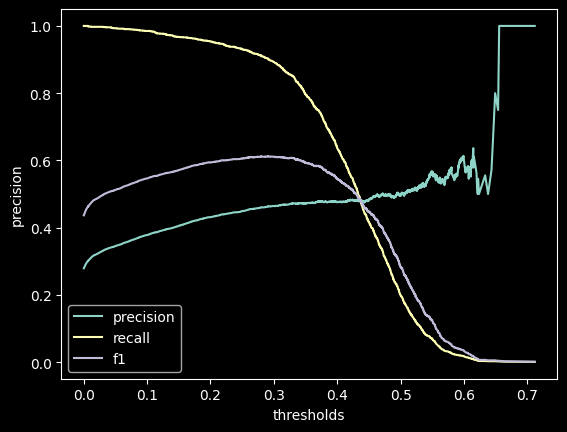

           fpr       tpr     thred
0     0.000000  0.000000       inf
1     0.000000  0.000681  0.711718
2     0.000000  0.002044  0.655602
3     0.000264  0.002044  0.653908
4     0.000264  0.002725  0.649272
...        ...       ...       ...
1671  0.896752  0.998638  0.007077
1672  0.896752  0.999319  0.007069
1673  0.899921  0.999319  0.006763
1674  0.899921  1.000000  0.006755
1675  1.000000  1.000000  0.000179

[1676 rows x 3 columns]
0.7782635489689739
      precision    recall  thresholds        f1
0      0.279353  1.000000    0.000179  0.436710
1      0.279406  1.000000    0.000192  0.436775
2      0.279459  1.000000    0.000223  0.436840
3      0.279513  1.000000    0.000229  0.436905
4      0.279566  1.000000    0.000232  0.436970
...         ...       ...         ...       ...
5250   0.800000  0.002725    0.649272  0.005431
5251   0.750000  0.002044    0.653908  0.004076
5252   1.000000  0.002044    0.655602  0.004079
5253   1.000000  0.001362    0.663711  0.002721
5254   1

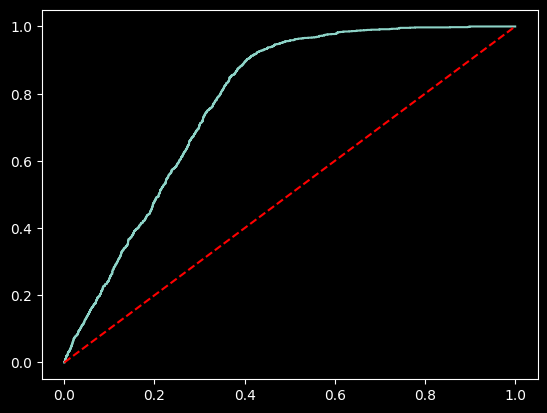

In [239]:
Solution(rfc_grid).model_check(x_train, y_train, x_test, y_test)

In [237]:
y_test.value_counts()

,count
Satisfaction Level,
0,3787
1,1468


In [238]:
1468 / (1468+3787)

0.27935299714557565

In [216]:
from sklearn.metrics import precision_score, recall_score

In [217]:
model_result = []

In [242]:
class Solution:
  def __init__(self, model):
    self.model = model
    self.model_name = model.__class__.__name__

  def model_check(self, x_train, y_train, x_test, y_test):
    try:
      self.model.fit(x_train, y_train)


      y_pred_train = self.model.predict(x_train)
      y_pred_test = self.model.predict(x_test)

      kfold = KFold(n_splits=5, shuffle=True, random_state=42)

      print('cross_val')
      cross_val = cross_val_score(self.model, x_train, y_train, cv=kfold, scoring='accuracy')
      print(cross_val)
      print(cross_val.mean())


      print('class_report')
      print(classification_report(y_train, y_pred_train))
      print(classification_report(y_test, y_pred_test))

      model_result.append({'model_name': self.model_name,'precision' : precision_score(y_test, y_pred_test), 'recall' :recall_score(y_test, y_pred_test), 'accuracy_score' : accuracy_score(y_test, y_pred_test)})

      c_matrix = confusion_matrix(y_test, y_pred_test)
      c_matrix_ratio = np.round(c_matrix / c_matrix.sum(),2)

      figs, axes = plt.subplots(1,2, figsize=(10,5))
      sns.heatmap(c_matrix, cmap='Blues', annot=True, ax=axes[0], fmt='.2f')
      sns.heatmap(c_matrix_ratio, vmax=1, vmin=-1, cmap='Blues', annot=True, ax=axes[1])
      plt.show()


      figs, axes = plt.subplots(1,2, figsize=(10,5))

      top10 = pd.Series(self.model.feature_importances_, index=x_train.columns)
      top10 = top10.sort_values(ascending=False).head(20)
      print(top10)
      sns.barplot(x=top10, y=top10.index, ax=axes[0], palette = 'pastel')
      axes[1].plot(top10.cumsum(), marker='o')
      plt.xticks(rotation=90)
      axes[1].axhline(y=0.8)
      plt.show()





      print('roc curve')
      y_pred_test_prob = self.model.predict_proba(x_test)[:,1]



      precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob)
      precision_recall = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1], 'thresholds':thresholds})
      precision_recall['f1'] = 2 *(precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
      print(precision_recall)

      sns.lineplot(data=precision_recall, x='thresholds' ,y='precision', label='precision')
      sns.lineplot(data=precision_recall, x='thresholds' ,y='recall', label='recall')
      sns.lineplot(data=precision_recall, x='thresholds' ,y='f1', label='f1')
      plt.legend()
      plt.show()


      fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)



      print(pd.DataFrame({'fpr': fpr, 'tpr':tpr, 'thred':thresholds}))
      plt.plot(fpr, tpr)
      plt.plot([0,1], [0,1], color='red', linestyle='--')

      print(roc_auc_score(y_test, y_pred_test_prob))

      a= 0.5

      y_pred_test = np.where(y_pred_test_prob >a, 1, 0)



      precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob)
      precision_recall = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1], 'thresholds':thresholds})
      precision_recall['f1'] = 2 *(precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
      print(precision_recall)



    except Exception as e:
      print(e)

cross_val
[0.71611983 0.72039943 0.73323823 0.73428571 0.71285714]
0.7233800692887712
class_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2535
           1       1.00      1.00      1.00       968

    accuracy                           1.00      3503
   macro avg       1.00      1.00      1.00      3503
weighted avg       1.00      1.00      1.00      3503

              precision    recall  f1-score   support

           0       0.76      0.91      0.82      3787
           1       0.50      0.24      0.33      1468

    accuracy                           0.72      5255
   macro avg       0.63      0.57      0.57      5255
weighted avg       0.68      0.72      0.68      5255



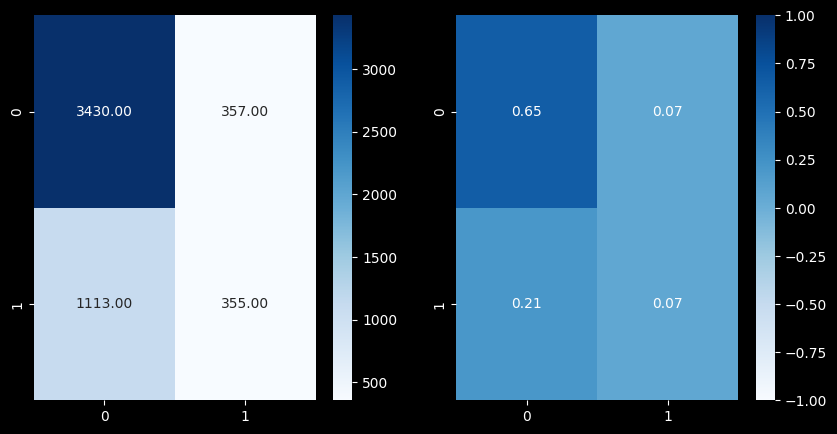

20    0.091647
0     0.083859
17    0.076417
6     0.063777
18    0.055727
1     0.050497
23    0.046277
10    0.039553
12    0.037435
22    0.036929
11    0.034530
8     0.034518
9     0.034375
4     0.032629
14    0.032179
2     0.031567
3     0.031297
21    0.031040
5     0.030223
7     0.029686
dtype: float64


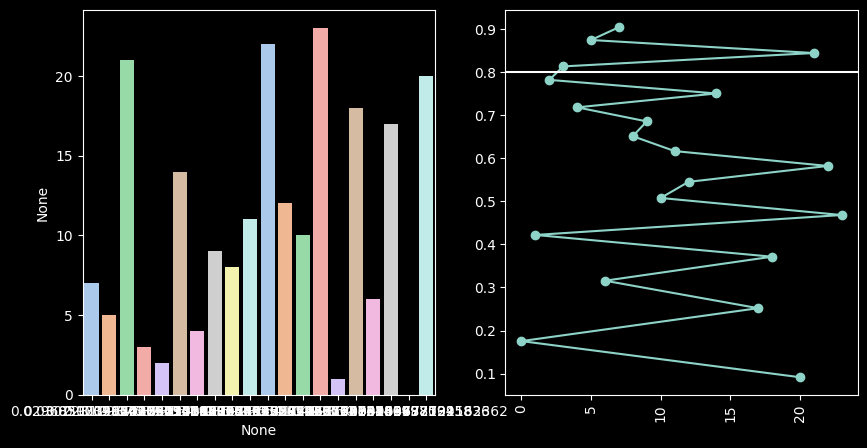

roc curve
    precision    recall  thresholds        f1
0    0.279353  1.000000        0.00  0.436710
1    0.307016  0.998638        0.01  0.469646
2    0.321900  0.997275        0.02  0.486702
3    0.332123  0.996594        0.03  0.498212
4    0.340153  0.996594        0.04  0.507194
..        ...       ...         ...       ...
74   0.500000  0.002044        0.74  0.004071
75   0.600000  0.002044        0.75  0.004073
76   0.750000  0.002044        0.76  0.004076
77   0.500000  0.000681        0.79  0.001361
78   1.000000  0.000681        0.80  0.001361

[79 rows x 4 columns]


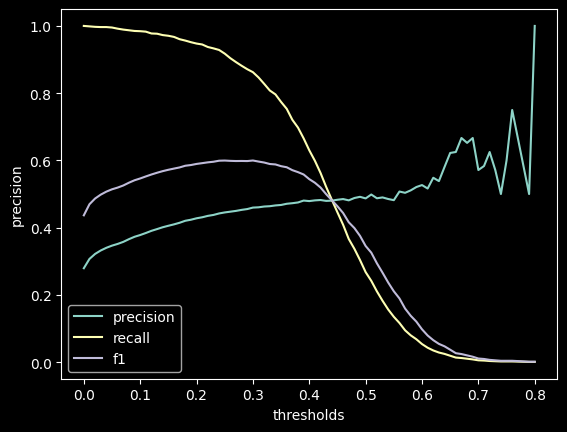

         fpr       tpr  thred
0   0.000000  0.000000    inf
1   0.000000  0.000681   0.80
2   0.000264  0.000681   0.79
3   0.000264  0.002044   0.76
4   0.000792  0.002044   0.74
..       ...       ...    ...
73  0.749406  0.996594   0.04
74  0.776868  0.996594   0.03
75  0.814365  0.997275   0.02
76  0.873779  0.998638   0.01
77  1.000000  1.000000   0.00

[78 rows x 3 columns]
0.7739057286903641
    precision    recall  thresholds        f1
0    0.279353  1.000000        0.00  0.436710
1    0.307016  0.998638        0.01  0.469646
2    0.321900  0.997275        0.02  0.486702
3    0.332123  0.996594        0.03  0.498212
4    0.340153  0.996594        0.04  0.507194
..        ...       ...         ...       ...
74   0.500000  0.002044        0.74  0.004071
75   0.600000  0.002044        0.75  0.004073
76   0.750000  0.002044        0.76  0.004076
77   0.500000  0.000681        0.79  0.001361
78   1.000000  0.000681        0.80  0.001361

[79 rows x 4 columns]


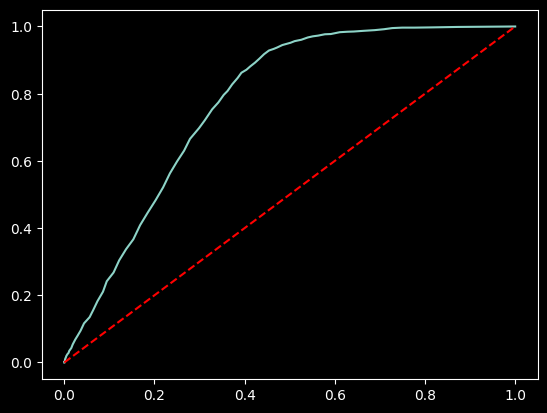

In [243]:

Solution(rfc).model_check(x_train, y_train, x_test, y_test)

In [95]:
xgb_c = xgb.XGBClassifier()
Solution(xgb_c).model_check(x_train, y_train, x_test, y_test)

cross_val
[0.81448864 0.78920455 0.80397727 0.80227273 0.79914773]
0.8018181818181818
class_report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8773
           1       0.97      0.95      0.96      8827

    accuracy                           0.96     17600
   macro avg       0.96      0.96      0.96     17600
weighted avg       0.96      0.96      0.96     17600

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      3837
           1       0.80      0.79      0.79      3707

    accuracy                           0.80      7544
   macro avg       0.80      0.80      0.80      7544
weighted avg       0.80      0.80      0.80      7544

name 'precision_score' is not defined


In [96]:
lgb_c = lgb.LGBMClassifier()
Solution(lgb_c).model_check(x_train, y_train, x_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8827, number of negative: 8773
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2195
[LightGBM] [Info] Number of data points in the train set: 17600, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501534 -> initscore=0.006136
[LightGBM] [Info] Start training from score 0.006136
cross_val
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7048, number of negative: 7032
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2195
[LightGBM] 

In [97]:
model_result

[]